In [1]:
import hist_eq
import cv2 
import matplotlib.pyplot as plt
import numpy as np 

# Histogram Equalization

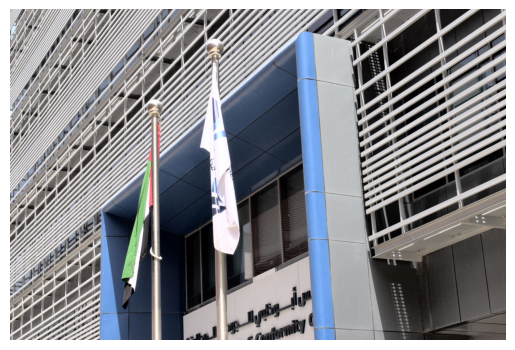

In [2]:
img = cv2.imread('data/DSC_0232.JPG')
hist_equalized = hist_eq.histogram_equalization(img)

# ? The following line saves our output img
cv2.imwrite('data/our_histogram_output.png', hist_equalized)

plt.imshow(cv2.cvtColor(hist_equalized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

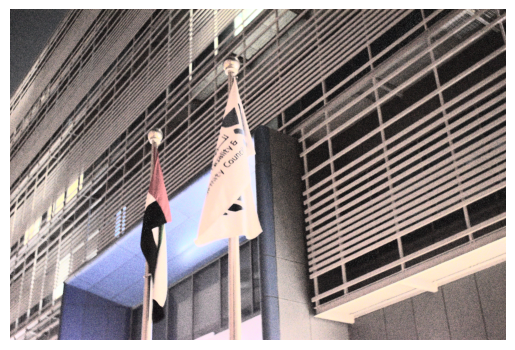

In [9]:
img2 = cv2.imread('data/DSC_0214.JPG')
hist_equalized2 = hist_eq.histogram_equalization(img2)

# ? The following line saves our output img, Downscaling to save below 5MB
cv2.imwrite('data/our_histogram_output2.png', 
            hist_eq.resize_with_aspect_ratio(hist_equalized2, height=5000))

plt.imshow(cv2.cvtColor(hist_equalized2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

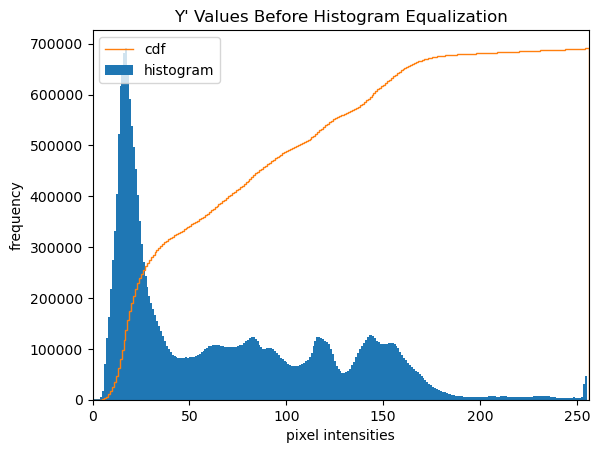

In [4]:
# ? Plotting Luminance before equalization
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
hist_eq.plot_histogram(img_yuv[:, :, 0], "Y' Values Before Histogram Equalization")


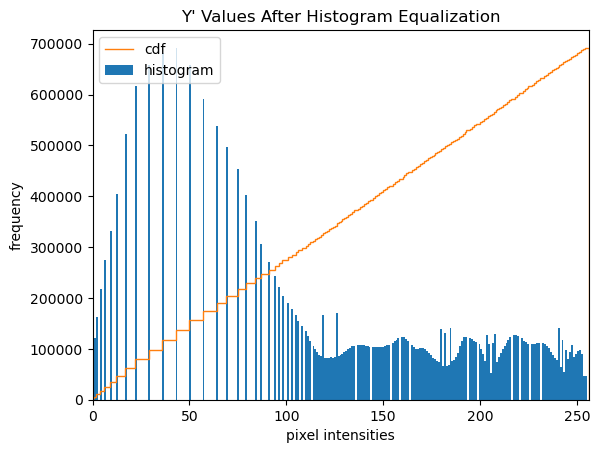

In [5]:
# ? Plotting Luminance after equalization
hist_eq.plot_histogram(
    hist_eq.histogram_equalization_channel(
        img_yuv[:,:,0]
    ), "Y' Values After Histogram Equalization"
)


In [6]:
# ? Comparing with OpenCV
cv2_result = hist_eq.equalize_histogram_cv(img)
res = np.hstack((hist_equalized,cv2_result))

# ? Resizing to decrease storage size
cv2.imwrite('data/histogram_compare_with_cv2.png', hist_eq.resize_with_aspect_ratio(res, height=6000))




print(f'Mean Square Error: {hist_eq.mean_squared_error(hist_equalized, cv2_result):.2f}')
print(f'PSNR: {hist_eq.psnr(hist_equalized, cv2_result):.2f} db')


Mean Square Error: 15.15
PSNR: 36.33 db
